In [85]:
#Import Statements
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [86]:
#Open CSV file
CovidDF = pd.read_csv('/Users/gurjy/Downloads/download')

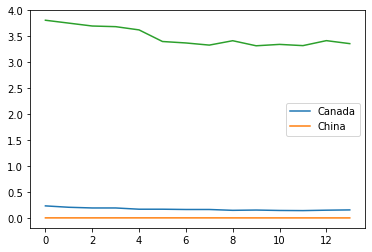

In [87]:
CovidDF = CovidDF.dropna()

CovidDFusa = CovidDF[CovidDF['countriesAndTerritories'] == 'United_States_of_America']
CovidDFCanada = CovidDF[CovidDF['countriesAndTerritories'] == 'Canada']
CovidDFChina = CovidDF[CovidDF['countriesAndTerritories'] == 'China']
rollingaverageCANADA = CovidDFCanada['deaths'].rolling(14).sum()/CovidDFCanada['popData2019'][7236]*100000
fourteencumulativedaydeathsCANADA = [rollingaverageCANADA[x] for x in range(7249, 7263)]

rollingaverageUSA = CovidDFusa['deaths'].rolling(14).sum()/CovidDFusa['popData2019'][41374]*100000
fourteencumulativedaydeathsUSA = [rollingaverageUSA[x] for x in range(41387, 41401)]

rollingaverageCHINA= CovidDFChina['deaths'].rolling(14).sum()/CovidDFChina['popData2019'][8490]*100000
fourteencumulativedaydeathsCHINA = [rollingaverageCHINA[x] for x in range(8503, 8517)]


plt.plot(range(0, 14), fourteencumulativedaydeathsCANADA[::-1])

plt.plot(range(0, 14), fourteencumulativedaydeathsCHINA[::-1])

plt.plot(range(0, 14), fourteencumulativedaydeathsUSA[::-1])

plt.legend(['Canada', 'China'])

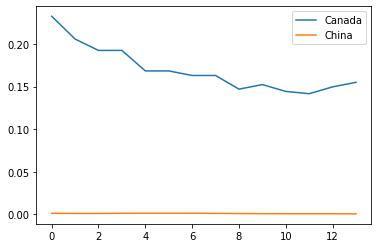

In [88]:
plt.plot(range(0, 14), fourteencumulativedaydeathsCANADA[::-1])

plt.plot(range(0, 14), fourteencumulativedaydeathsCHINA[::-1])

plt.legend(['Canada', 'China'])

In [89]:
#see head of dataframe
CovidDF.head(14)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,17/09/2020,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
1,16/09/2020,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649
2,15/09/2020,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159
3,14/09/2020,14,9,2020,75,0,Afghanistan,AF,AFG,38041757.0,Asia,1.456294
4,13/09/2020,13,9,2020,35,0,Afghanistan,AF,AFG,38041757.0,Asia,1.309088
5,12/09/2020,12,9,2020,34,0,Afghanistan,AF,AFG,38041757.0,Asia,1.224970
6,11/09/2020,11,9,2020,28,0,Afghanistan,AF,AFG,38041757.0,Asia,1.164510
7,10/09/2020,10,9,2020,24,2,Afghanistan,AF,AFG,38041757.0,Asia,1.098793
8,09/09/2020,9,9,2020,26,3,Afghanistan,AF,AFG,38041757.0,Asia,1.180282
9,08/09/2020,8,9,2020,96,3,Afghanistan,AF,AFG,38041757.0,Asia,1.114565


In [90]:
#evaluate types
CovidDF.dtypes

dateRep                                                        object
day                                                             int64
month                                                           int64
year                                                            int64
cases                                                           int64
deaths                                                          int64
countriesAndTerritories                                        object
geoId                                                          object
countryterritoryCode                                           object
popData2019                                                   float64
continentExp                                                   object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    float64
dtype: object

In [91]:
#see statistics in data set
CovidDF.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,40345.000000,40345.000000,40345.0,40345.000000,40345.000000,4.034500e+04,40345.000000
mean,15.650167,5.778857,2020.0,740.634998,23.323039,4.352456e+07,32.692452
std,8.789114,2.079801,0.0,4454.383489,130.907297,1.593796e+08,75.593779
min,1.000000,1.000000,2020.0,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,4.000000,2020.0,0.000000,0.000000,1.355982e+06,0.366917
50%,15.000000,6.000000,2020.0,13.000000,0.000000,8.519373e+06,4.521082
75%,23.000000,7.000000,2020.0,176.000000,3.000000,2.916192e+07,26.125156
max,31.000000,9.000000,2020.0,97894.000000,4928.000000,1.433784e+09,1058.225943


In [92]:
#convert all numbers in cases, deaths, cumulative_number to positives
CovidDF['cases'] = CovidDF['cases'] .abs()
CovidDF['deaths'] = CovidDF['deaths'].abs()
CovidDF['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] = CovidDF['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].abs()

In [93]:
CovidDF.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,40345.000000,40345.000000,40345.0,40345.000000,40345.000000,4.034500e+04,40345.000000
mean,15.650167,5.778857,2020.0,741.445607,23.442508,4.352456e+07,32.788201
std,8.789114,2.079801,0.0,4454.248629,130.885955,1.593796e+08,75.552297
min,1.000000,1.000000,2020.0,0.000000,0.000000,8.150000e+02,0.000000
25%,8.000000,4.000000,2020.0,0.000000,0.000000,1.355982e+06,0.370995
50%,15.000000,6.000000,2020.0,13.000000,0.000000,8.519373e+06,4.526350
75%,23.000000,7.000000,2020.0,176.000000,3.000000,2.916192e+07,26.190997
max,31.000000,9.000000,2020.0,97894.000000,4928.000000,1.433784e+09,1058.225943


Text(0.5, 1.0, 'World Deaths')

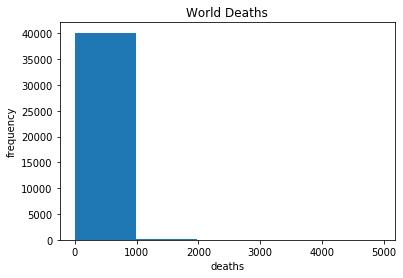

In [94]:
plt.hist(CovidDF['deaths'], bins = 5)
plt.xlabel('deaths')
plt.ylabel('frequency')
plt.title('World Deaths')

Text(0.5, 1.0, 'World Cases')

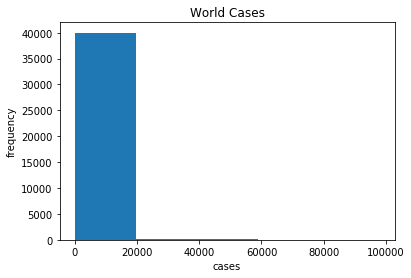

In [95]:
plt.hist(CovidDF['cases'], bins = 5)
plt.xlabel('cases')
plt.ylabel('frequency')
plt.title('World Cases')

(array([3.9842e+04, 1.5800e+02, 1.0600e+02, 6.2000e+01, 6.1000e+01,
        5.2000e+01, 3.1000e+01, 1.5000e+01, 8.0000e+00, 1.0000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

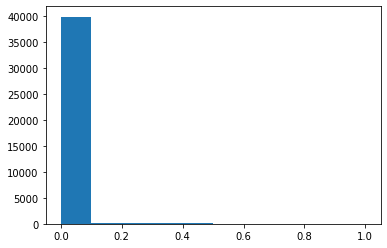

In [96]:
plt.hist(MinMaxScaler().fit_transform(CovidDF[['cases']]))

(array([3.9802e+04, 3.3300e+02, 1.6400e+02, 2.5000e+01, 1.3000e+01,
        2.0000e+00, 1.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

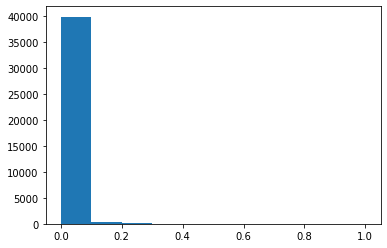

In [97]:
df = pd.DataFrame(CovidDF['deaths'])
df['cases'] = CovidDF['cases']
df['deaths'] = MinMaxScaler().fit_transform(df[['deaths']])
plt.hist(df['deaths'])

Text(0.5, 0, 'cases')

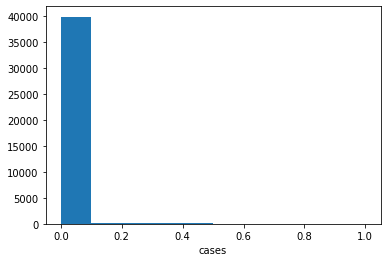

In [98]:
df['cases'] = MinMaxScaler().fit_transform(df[['cases']])
plt.hist(df['cases'])
plt.xlabel('cases')

Text(0.5, 0, 'cases')

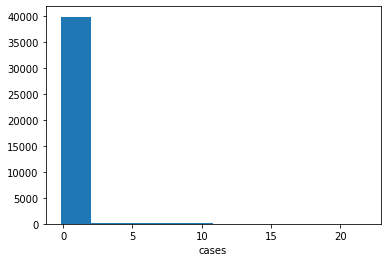

In [101]:
testdf = pd.DataFrame(CovidDF['deaths'])
testdf['cases'] = CovidDF['cases']
testdf['cases'] = StandardScaler().fit_transform(testdf[['cases']])
plt.hist(testdf['cases'])
plt.xlabel('cases')

Text(0.5, 0, 'deaths')

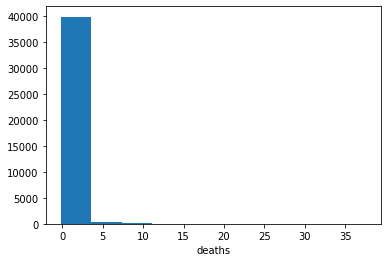

In [102]:
testdf['deaths'] = StandardScaler().fit_transform(testdf[['deaths']])
plt.hist(testdf['deaths'])
plt.xlabel('deaths')

In [235]:
CovidDF.groupby(['month']).sum()

,day,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
month,,,,,,
1,27588,2533080,9765,212,1.102120e+11,9.494658
2,28710,3866280,74707,2702,1.682183e+11,150.000095
3,44706,4680340,713121,35607,1.773923e+11,38166.036608
4,92999,11724080,2331293,189099,2.271054e+11,167942.210693
5,102558,12899720,2883066,144006,2.374732e+11,138218.374930
6,96702,12602780,4234645,134161,2.299731e+11,179060.938183
7,103168,13024960,7051516,166224,2.376684e+11,247716.722874
8,103168,13024960,7974888,179475,2.376684e+11,341028.112195
9,31807,7140700,4640622,94302,1.302873e+11,210548.062737


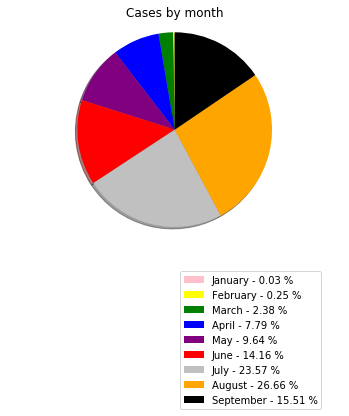

In [236]:

x =  ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'December 2019']
sizes = CovidDF.groupby(['month']).sum()['cases']
percent = 100.*sizes/sizes.sum()
colors = ['pink', 'yellow', 'green', 'blue', 'purple', 'red', 'silver', 'orange', 'black', 'brown']
explode = (0, 0, 0, 0, 0, 0,0,0,0,0)  # explode 1st slice
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
# Plot
plt.title("Cases by month")
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="lower left", bbox_to_anchor=(0.5,-0.80))
plt.axis('equal')
plt.show()

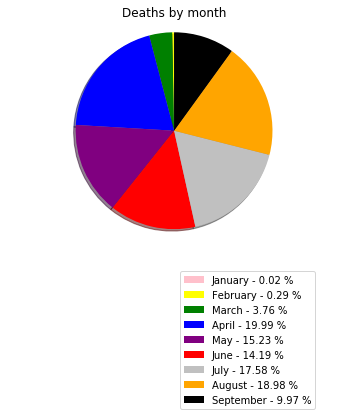

In [237]:
x =  ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'December 2019']
sizes = CovidDF.groupby(['month']).sum()['deaths']
percent = 100.*sizes/sizes.sum()
colors = ['pink', 'yellow', 'green', 'blue', 'purple', 'red', 'silver', 'orange', 'black', 'brown']
explode = (0, 0, 0, 0, 0, 0,0,0,0,0)  # explode 1st slice
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
# Plot
plt.title("Deaths by month")
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="lower left", bbox_to_anchor=(0.5,-0.80))
plt.axis('equal')
plt.show()

In [238]:
CovidDF = CovidDF.groupby(['countriesAndTerritories']).sum().sort_values(['cases'], ascending = False)
CovidDF

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
countriesAndTerritories,,,,,,,
United_States_of_America,3920,1243,502980,6630891,196802,8.193716e+10,27199.331614
India,3911,1240,500960,5118253,83198,3.388716e+11,4631.584427
Brazil,3920,1243,502980,4419083,134106,5.255133e+10,28058.085742
Russia,3920,1243,502980,1079519,18917,3.632219e+10,10017.866317
Peru,2857,1106,365620,744166,31049,5.884394e+09,30469.822299
...,...,...,...,...,...,...,...
Holy_See,2689,1085,351480,7,0,1.418100e+05,18527.607362
Saint_Kitts_and_Nevis,2543,1045,329260,6,0,8.611942e+06,287.693531
Greenland,2570,1069,341380,4,0,9.575540e+06,211.789622


<BarContainer object of 5 artists>

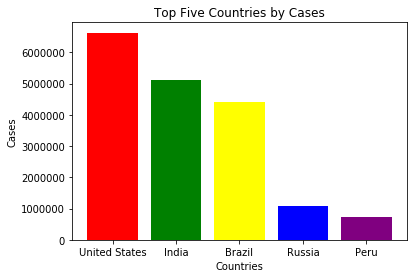

In [239]:
plt.title('Top Five Countries by Cases')
plt.xlabel('Countries')
plt.ylabel('Cases')
plt.bar(['United States', 'India', 'Brazil', 'Russia', 'Peru'], CovidDF['cases'][[0,1,2,3,4]], color = ['red', 'green', 'yellow', 'blue', 'purple'])

In [240]:
CovidDF = CovidDF.groupby(['countriesAndTerritories']).sum().sort_values(['deaths'], ascending = False)
CovidDF

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
countriesAndTerritories,,,,,,,
United_States_of_America,3920,1243,502980,6630891,196802,8.193716e+10,27199.331614
Brazil,3920,1243,502980,4419083,134106,5.255133e+10,28058.085742
India,3911,1240,500960,5118253,83198,3.388716e+11,4631.584427
Mexico,3866,1219,486820,680931,71978,3.074570e+10,7135.728201
United_Kingdom,3920,1243,502980,378219,41684,1.659513e+10,7515.737516
...,...,...,...,...,...,...,...
Bhutan,2716,1088,353500,243,0,1.335414e+08,432.450000
Saint_Kitts_and_Nevis,2543,1045,329260,6,0,8.611942e+06,287.693531
Saint_Lucia,2689,1085,351480,24,0,3.180633e+07,188.188955


<BarContainer object of 5 artists>

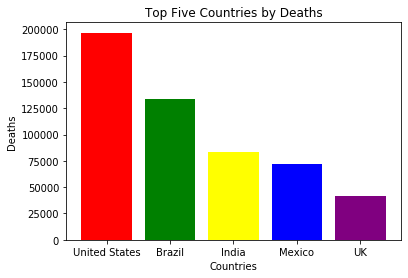

In [241]:
plt.title('Top Five Countries by Deaths')
plt.xlabel('Countries')
plt.ylabel('Deaths')
plt.bar(['United States', 'Brazil', 'India', 'Mexico', 'UK'], CovidDF['deaths'][[0,1,2,3,4]], color = ['red', 'green', 'yellow', 'blue', 'purple'])